# Linear Regression
Linear regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

$$
\mathbf{y} = \mathbf{X\beta} 
$$

Where:
- $n$: amount of observations
- $p$: amount of features
- $\mathbf{y} \in \mathbb{R}^{n \times 1}$: observed outputs/target vector
- $\mathbf{X} \in \mathbb{R}^{n \times p}$: feature matrix (rows are observations, column are feature, includes column of 1s for intercept)
- $\mathbf{\beta} \in \mathbb{R}^{p \times 1}$: coefficient vector/parameters

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
Y = np.array(diabetes.target)
X = np.concatenate((df.to_numpy(), np.ones((df.shape[0], 1))), axis=1)

### Least Squares Method
The Least Squares Method analytically minimizes the cost function, or the sum of squared errors (residuals):

$$
J(\beta) = ||\mathbf{y - X\beta}||^2 = (\mathbf{y - X\beta})^{\top}(\mathbf{y - X\beta})
$$

Derivation:
$$
J(\beta) = \mathbf{y^{\top}y} - 2 \mathbf{\beta^{\top}X^{\top}y} + \mathbf{\beta^{\top}X^{\top}X\beta} 
$$

$$
\nabla_{\beta}\mathbf{J} = -2\mathbf{X^{\top}y} + 2\mathbf{X^{\top}X\beta}
$$

$$
\mathbf{2X^{\top}y+2X^{\top}X\beta} = 0
$$

$$
\mathbf{X^{\top}X\beta=X^{\top}y}
$$

$$
\beta = \mathbf{(X^{\top}X)^{-1}X^{\top}y}
$$

Running Complexity:

$O(np^2 + p^3)$, with $n$ samples and $p$ features

$X^{\top}X$ takes $O(np^2)$ and inverting a $p \times p$ matrix takes $O(p^3)$. 

Thus, the least squares method is best used when the amount of features is small.

In [14]:
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Least Squares Coefficents:")
for i in range(1, 11):
    print(f"beta {i}: {round(beta[i-1], 3)}")
print("Least Squares Intercept:", round(beta[-1], 3), "\n")

Least Squares Coefficents:
beta 1: -10.01
beta 2: -239.816
beta 3: 519.846
beta 4: 324.385
beta 5: -792.176
beta 6: 476.739
beta 7: 101.043
beta 8: 177.063
beta 9: 751.274
beta 10: 67.627
Least Squares Intercept: 152.133 



### Gradient Descent Method
The Gradient Descent Method minimizes the cost function by iteratively updating the parameters in the direction of the negative gradient:

$$
J(\beta) = \frac{1}{2n}||\mathbf{y - X\beta}||^2 
$$

$$
J(\beta) = \frac{1}{2n}(\mathbf{y - X\beta})^{\top}(\mathbf{y - X\beta})
$$

$$
\nabla_{\beta}J = \frac{1}{2n}\nabla_{\beta}[\mathbf{y^{\top}y}-2\mathbf{\beta^{\top}X^{\top}y+\beta^{\top}X^{\top}X\beta}]
$$

$$
\nabla_{\beta}J = \frac{1}{2n}[-2\mathbf{X^{\top}y}+2\mathbf{X^{\top}X\beta}]=\frac{1}{n}\mathbf{X^{\top}}\mathbf{(X\beta-y)}
$$

Update Rule:
$$
\beta^{(t+1)}=\beta^{t}-\alpha\nabla_{\beta}J
$$
Where:
- $\alpha$ is the learning rate
- $t$ is the current iteration
- $\nabla_{\beta}J=\frac{1}{n}\mathbf{X^{\top}}\mathbf{(X\beta-y)}$
- $||\beta^{(t+1)}-\beta^{t}||_2<\epsilon$ is the stopping condition

Running Complexity:

$O(knp)$, with $k$ iterations, $n$ samples, and $p$ features

For $k$ iterations, each gradient calculation takes $O(np)$

Works best when the number of features is large


In [15]:
beta = np.zeros((X.shape[1]))
prev = np.ones_like(beta)
alpha = 1.97 # manually tuned
epsilon = 1e-5
iterations = 0
while (np.linalg.norm(beta - prev) > epsilon):
    prev = beta.copy()
    beta -= alpha * 1/X.shape[0] * X.T @ (X @ beta - Y) 
for i in range(1, 11):
    print(f"beta {i}: {round(beta[i-1], 3)}")
print("Least Squares Intercept:", round(beta[-1], 3), "\n")

beta 1: -10.009
beta 2: -239.815
beta 3: 519.848
beta 4: 324.384
beta 5: -791.99
beta 6: 476.591
beta 7: 100.96
beta 8: 177.039
beta 9: 751.204
beta 10: 67.627
Least Squares Intercept: 152.133 



### Solution from Sklearn

In [16]:
model = LinearRegression()
model.fit(df, Y)
coef = model.coef_
intercept = model.intercept_
for i in range(1, 11):
    print(f"beta {i}: {round(coef[i-1], 3)}")
print("Least Squares Intercept:", round(intercept, 3), "\n")

beta 1: -10.01
beta 2: -239.816
beta 3: 519.846
beta 4: 324.385
beta 5: -792.176
beta 6: 476.739
beta 7: 101.043
beta 8: 177.063
beta 9: 751.274
beta 10: 67.627
Least Squares Intercept: 152.133 



### Visualization of model against BMI and Blood Pressure
Note that each line is based on all features, not just the displayed data, so the line may not fit perfectly on a single feature.

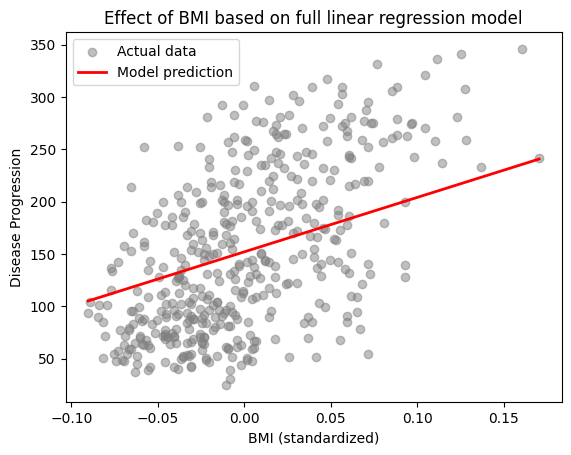

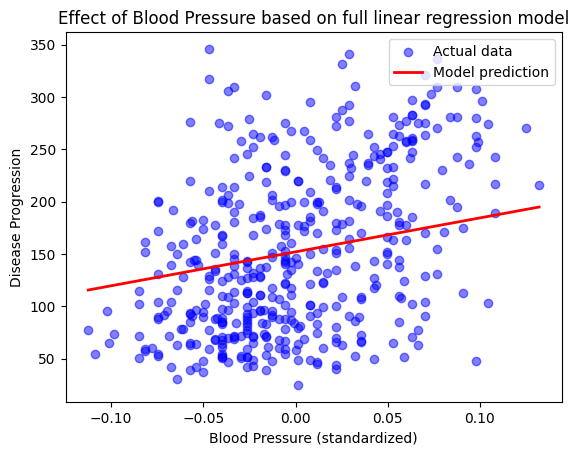

In [19]:
import matplotlib.pyplot as plt
bmi_index=2
bp_index=3
bmi_vals = np.linspace(X[:, bmi_index].min(), X[:, bmi_index].max(), 100)
bp_vals = np.linspace(X[:, bp_index].min(), X[:, bp_index].max(), 100)
y_pred_bmi = bmi_vals * beta[bmi_index] + beta[-1]
y_pred_bp = bp_vals * beta[bp_index] + beta[-1]
plt.scatter(X[:, bmi_index], Y, color='gray', alpha=0.5, label='Actual data')
plt.plot(bmi_vals, y_pred_bmi, color='red', linewidth=2, label='Model prediction')
plt.xlabel('BMI (standardized)')
plt.ylabel('Disease Progression')
plt.title('Effect of BMI based on full linear regression model')
plt.legend()
plt.show()
plt.scatter(X[:, bp_index], Y, color='blue', alpha=0.5, label='Actual data')
plt.plot(bp_vals, y_pred_bp, color='red', linewidth=2, label='Model prediction')
plt.xlabel('Blood Pressure (standardized)')
plt.ylabel('Disease Progression')
plt.title('Effect of Blood Pressure based on full linear regression model')
plt.legend()
plt.show()


### Metrics

$R^2 = 0.518$: About 51.8% of the variability of the data is explained by this linear regression model.

$RMSE = 53.5$: On average, this model's predictions are off by about 53.5 units.

$MAE = 43.2$: On average, this model's predictions are off by about 43.2 units, excluding outliers.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = X @ beta

mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f'R^2: {r2:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')

R^2: 0.518
MSE: 2859.696
RMSE: 53.476
MAE: 43.277
